In [1]:
# Import modules and subroutines:

include("../subroutines/Subroutines.jl");

3.10.9


In [2]:
function Be2_xyz(bl)
    
    a = """
    2

    Be -$(bl/2) 0.0 0.0 
    Be $(bl/2) 0.0 0.0 
    """
    
    fpath = "../configs/xyz_files/Be2/$(bl).xyz"

    write(fpath, a)
    
end

Be2_xyz (generic function with 1 method)

In [13]:
bond_lengths = [i/10 for i=5:30];

In [4]:
for bl in bond_lengths
    Be2_xyz(bl)
end

In [6]:
println(bond_lengths)

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


In [ ]:
# Generate some chemical data:

bond_lengths = [i/10 for i=5:30];

py"""

config = configparser.ConfigParser()
config.read(wd+'/../configs/pyscf_configs/Be2_ccpvdz.ini')
RunPySCF.RunPySCF(config, nosec=True)

"""


In [8]:
md_fname = "Be2_sto3g_010924%1407.hdf5"

chemical_data_list = ReadIn("../datasets/pyscf_data/"*md_fname)

PrintChemData(chemical_data_list[10])

bond_lengths = [i/10 for i=5:30];

Molecule name: Be2
Basis set: sto3g
Molecular geometry: ../configs/xyz_files/Be2/1.4.xyz
RHF energy: -28.4705170004992
FCI energy: -28.63627236936717


In [4]:
size(chemical_data_list[1].h2e)

(10, 10, 10, 10)

In [13]:
chemical_data_list[1].N_spt

10

In [9]:
e_rhf_vec = [chemical_data_list[m].e_rhf for m=1:length(chemical_data_list)]
e_fci_vec = [chemical_data_list[m].e_fci for m=1:length(chemical_data_list)];

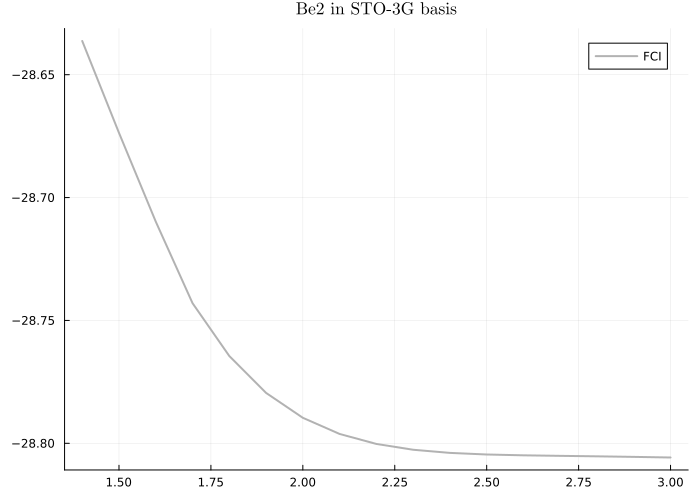

In [10]:
plot(
    bond_lengths[10:end], 
    e_fci_vec[10:end], 
    color=RGB(0.7,0.7,0.7), 
    linewidth=2.0,
    label="FCI",
    title="Be2 in STO-3G basis",
    titlefontsize=11.0,
    titlefont=font(14,"Computer Modern"),
    #xguide=L"r\quad(\AA)",
    #yguide=L"E\quad(\textrm{Ha.})",
    size=(700,500)
)